In [85]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import edward2 as ed
import numpy as np
import scipy as sp
import scipy.stats
tfd = tfp.distributions

In [132]:
import matplotlib.pyplot as plt

In [167]:
normal_data = sp.stats.norm.rvs(7, 1, size=10)

In [168]:
normal_data

array([5.30434367, 7.90830354, 7.41106737, 5.86660476, 7.17944534,
       7.83612387, 6.31405214, 7.10732185, 6.19206451, 8.53363127])

In [74]:
with tf.Session() as sess:
    sam = sess.run([normal])

In [114]:
scipy.stats.uniform.rvs(0, 1)

0.27924741993949376

In [143]:
def sample_poisson(last, accept=0.5):
    proposal = scipy.stats.poisson.rvs(last)
    q_p = scipy.stats.poisson.pmf(proposal, last)
    q_last = scipy.stats.poisson.pmf(last, proposal)
    f_p = scipy.stats.poisson.pmf(proposal, 7)
    f_last = scipy.stats.poisson.pmf(last, 7)
    
    a = np.minimum(1., (f_p * q_last) / (f_last * q_p))
    if a > scipy.stats.uniform.rvs(0, 1):
        return proposal
    return last

In [160]:
proposals = np.ones(10000)
for i in range(1, 10000):
    proposals[i] = sample_poisson(proposals[i - 1])

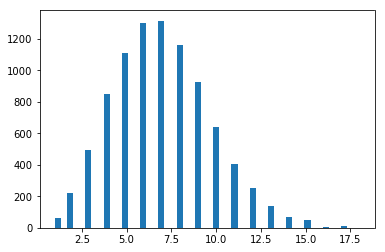

In [161]:
plt.hist(proposals[1000:], bins=50);

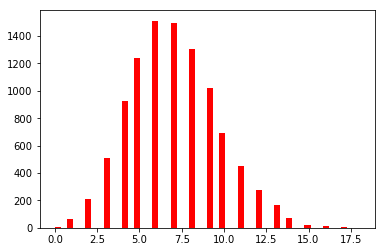

In [162]:
plt.hist(scipy.stats.poisson.rvs(7, size=10000), color="red", bins=50);

In [169]:
def log_likelihood(loc):    
    sigma = ed.InverseGamma(1, 1)
    y = ed.Normal(loc=loc, scale=sigma, name="y")
    return y

In [ ]:
def target_log_prob_fn(m, c):
    return ed.make_log_joint_fn(log_likelihood)(
        y=normal_data)
    return log_joint(x, cmin, cmax, mmu, msigma, sigma, m=m, c=c,
                     y=normal_data)

In [184]:
kernel = tfp.mcmc.HamiltonianMonteCarlo(
                target_log_prob_fn=make_likelihood(idx).log_prob,
                step_size=0.5, num_leapfrog_steps=2)

In [182]:
kernel._

<bound method Distribution.log_prob of <tfp.distributions.Normal 'Normal_118/' batch_shape=() event_shape=() dtype=float32>>

In [191]:
current_state = tf.zeros(1)
proposals = np.zeros(shape=(2, 10000))
with tf.Session() as sess:    
    for idx in range(1, 10000):
        proposals[0, i] = sample_poisson(proposals[0, i - 1])
        states, kernel_results = tfp.mcmc.sample_chain(
            current_state=states,            
            num_results=1,
            kernel=tfp.mcmc.HamiltonianMonteCarlo(
                target_log_prob_fn=make_likelihood((int)proposals[0, i]).log_prob,
                step_size=0.5, num_leapfrog_steps=2), num_burnin_steps=0)
        states, kernel_results = sess.run([states, kernel_results])
        states = states.reshape((1))
        if idx % 10 == 0:
            print(states)        
        proposals[1, i] = states

SyntaxError: invalid syntax (<ipython-input-191-2767c39d706f>, line 10)

In [193]:
np.ndarray.astype(proposals[0, i])

TypeError: descriptor 'astype' requires a 'numpy.ndarray' object but received a 'numpy.float64'